In [119]:
import yt
from yt.frontends.gizmo.api import GizmoDataset
from yt import YTArray
from yt import YTQuantity

import numpy as np
import h5py as h5
import matplotlib.pylab as plt
from matplotlib.colors import LogNorm, ListedColormap
import seaborn as sns
import palettable 
sns.set_style("ticks",{'axes.grid': True, 'grid.linestyle': '--'})

import importlib
import yt_helper as yth
import plotting_helper_functions as ph

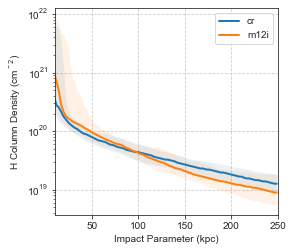

In [70]:
importlib.reload(ph)
# plottting H profile plot

field = 'H_nuclei_density'
# dont' need to run this because already generated the data
#ph.generate_projection_data('cr', field_list = [('gas', field)], weight_list = [None])
fig, ax = plt.subplots(figsize = (4,3.8))
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlim(10, 250)
ax.set_xlabel('Impact Parameter (kpc)')
ax.set_ylabel('H Column Density (cm$^{^-2}$)')
for model in ['cr', 'm12i']:
    xbins, ybins, counts = ph.generate_profile_from_projection('H_nuclei_density', model, ylims = (18, 22))
    x_med, median, mean, lowlim, uplim = ph.calculate_median_profile_from_meshgrid(xbins[1:], ybins[1:], counts,
                                                                  nbins = 100, convert_to_linear = False)
    ax.plot(x_med, median, linewidth = 2, label = model)
    ax.fill_between(x_med, lowlim, uplim, alpha = 0.1)
    
ax.legend()
plt.savefig('plots/example_H_column.png', dpi =300)
# note these are tester galaxies, not at same redshift can't reallycompare   

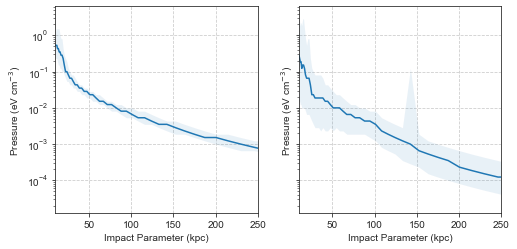

In [153]:
# plotting pressure profiles

pressure_field_list = ['pressure']
# dont' need to run this because already generated the data
#ph.generate_projection_data('cr', field_list = [('gas', field)], weight_list = [None])

model_list = ['cr', 'm12i']

fig, ax = plt.subplots(ncols = len(model_list), figsize = (4*len(model_list),3.8), sharex = True, sharey = True)
ax[0].set_yscale('log')
#ax.set_xscale('log')
ax[0].set_xlim(10, 250)

for i, model in enumerate(model_list):
    data = ph.get_radial_pressure_profile_data(model, field_list = pressure_field_list)
    r = data['spherical_position_radius']
    for field in pressure_field_list:
        ax[i].plot(r, data['%s_median'%field])
        ax[i].fill_between(r, data['%s_lowlim'%field], data['%s_uplim'%field], alpha = 0.1)
        
        
    ax[i].set_xlabel('Impact Parameter (kpc)')
    ax[i].set_ylabel('Pressure (eV cm$^{-3}$)')

# NOTE need to regenerate pressure field for CR galaxy 